# simple graph example

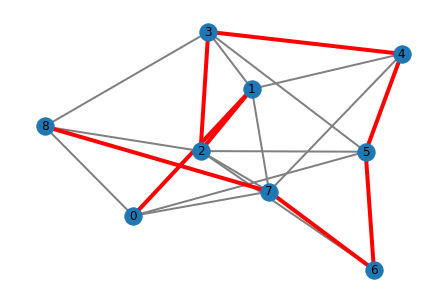

In [14]:
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

#update_f=GraphCNN(features)

In [20]:
import torch,einops
from torch import nn

In [55]:
def rotary_encoding(x, base=1e-5, thetas=None):
    """Applies a rotary embedding to a tensor.

    Args:
        x (torch.Tensor): Tensor to apply the rotary embedding to.
            x.shape=(sequence_lenght, n_heads, d_embedding)
        base (float, optional): Base of the logarithm. Defaults to 1e-5.
        thetas (torch.Tensor, optional): Tensor containing the thetas.
            It can be used in case you want to apply learned positional encoding.
            Defaults to None.

    Returns:
        torch.Tensor: Tensor with the rotary embedding applied.
    """
    assert x.shape[-1] % 2 == 0, 'the embedding dimension must be even'

    #pair up consecutive elements
    x1 = einops.rearrange(x, '... (n1 n2) -> ... n1 n2', n2=2)

    #pair up elements and swap them
    x2 = x1[..., torch.tensor([1, 0])]
    x2[..., 0] = -x2[..., 0]

    #create phases
    sin, cos = make_sin_cos(x1.shape, base, thetas, device=x.device)

    #apply rotation
    print(x1.shape, sin.shape)
    x1 = einops.einsum(x1, cos, 'n ... c a, n c -> n ... c a')
    x2 = einops.einsum(x2, sin, 'n ... c a, n c -> n ... c a')
    x = x1+x2
    x = einops.rearrange(x, '... n1 n2 -> ... (n1 n2)', n2=2)



def make_sin_cos(shape, base=1e-5, thetas=None, device='cpu'):

    if thetas is None:
        thetas = torch.logspace(0, 1, shape[-2], base, device=device)
    indices = torch.arange(0, shape[0], device=device)
    phases = einops.einsum(indices, thetas, 'a, c -> a c')

    #rotate
    sin = torch.sin(phases)
    cos = torch.cos(phases)

    #zetas = torch.linspace(gamma,2*x.shape[-1]+gamma,x.shape[-1],device=x.device)/(1+gamma)

    return sin, cos


In [53]:
x= torch.randn(2,6)
print(x)
x=einops.rearrange(x, '... (n1 n2) -> ... n1 n2', n2=2)
x.shape
#einops.rearrange(x, 'n1 n2 ...->(n1 n2) ...',n2=2)

tensor([[ 0.2688, -0.0036, -0.5314,  0.1919,  0.7778, -1.0645],
        [-0.5171,  0.8672, -0.6814,  2.0452,  0.2467, -1.7400]])


torch.Size([2, 3, 2])

In [54]:
x= torch.randn(2,20)
rotary_encoding(x)

torch.Size([2, 10, 2]) torch.Size([2, 10])


(-2.0, 0.05000891830399607)

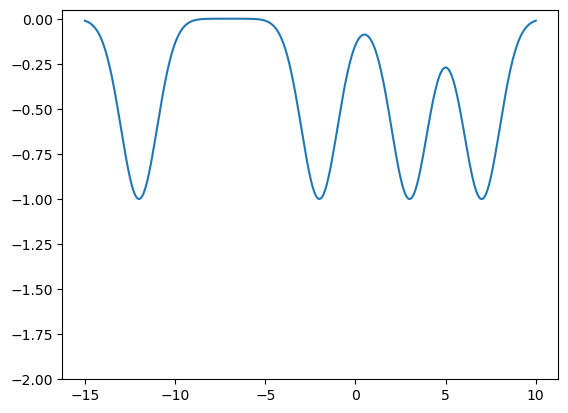

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


x=np.linspace(-15,10,1000)
y=-gaussian(x,-12,1)-gaussian(x,-2,1)-gaussian(x,3,1)-gaussian(x,7,1)

plt.plot(x,y)

plt.ylim(bottom=-2)


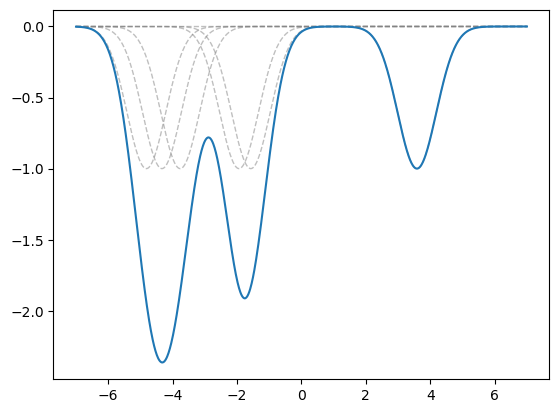

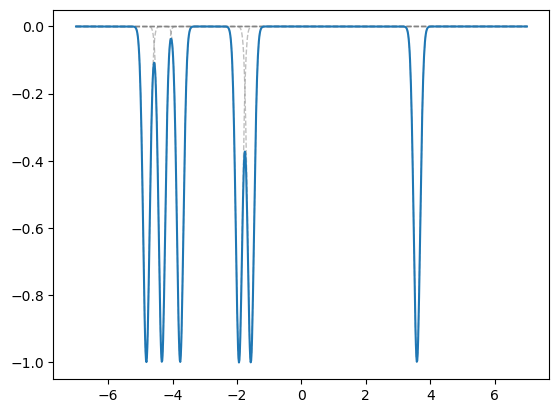

In [53]:
means=np.random.uniform(-5,5,6)
x=np.linspace(-7,7,1000)


In [69]:
#append element to numpy array
means[-1]=-6.3

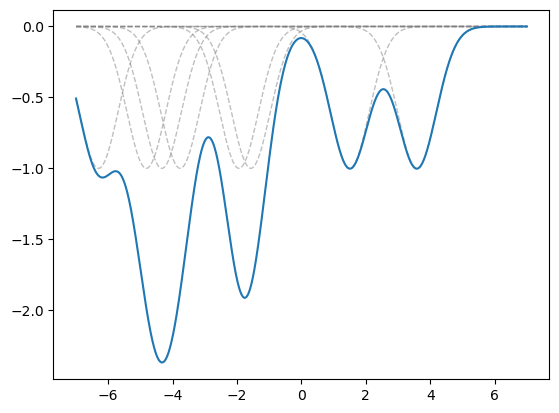

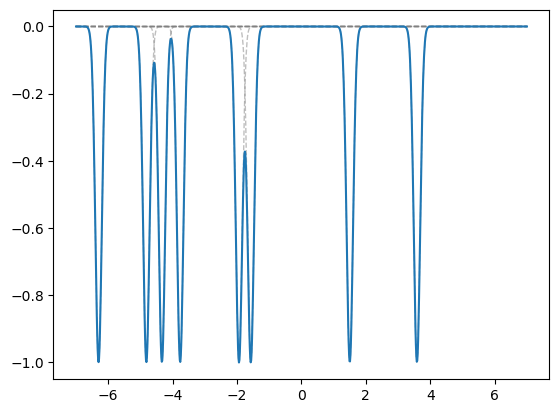

In [70]:
y=np.zeros_like(x)
for mean in means:
    plt.plot(x,-gaussian(x,mean,.6),color='gray',alpha=0.5,linestyle='--',linewidth=1)
    y-=gaussian(x,mean,.6)

plt.plot(x,y)
plt.show()
y=np.zeros_like(x)
for mean in means:
    plt.plot(x,-gaussian(x,mean,.1),color='gray',alpha=0.5,linestyle='--',linewidth=1)
    y-=gaussian(x,mean,.1)

plt.plot(x,y)